## Desafio 1: Análise Exploratória e Explanatória de Dados

#### Grupo 7: Tiago Botelho, Diego Brum, Gabriela Vasconcelos e Luccas Ribeiro

### Cenário:
Você como analista precisa conhecer a base de dados antes de conduzir processos decisórios. Nesse sentido existem muitos métodos que envolvem estatistica e visualização de dados. 

O objetivo inicial é entender os dados e não necessáriamente fazer gráficos visualmente bonitos, porém todas as lições que vimos sobre contruir visualizações fáceis de interpretar.

Para este exercício, vamos utilizar o dataset da Olist.

Sobre o dataset: Este dataset é um dataset público, liberado pela empresa Olist através da plataforma Kaggle. para mais informações sobre ele acesse: https://www.kaggle.com/olistbr/brazilian-ecommerce/version/2


### Aspectos pessoais
* `customer_id`: Identificador único do cliente
* `customer_unique_id`: Identificador único do cliente  
* `customer_zip_code_prefix`: Prefixo do CEP
* `customer_city`: Cidade do cliente
* `customer_state`: Estado do cliente


### Características do pedido
* `order_id`: Identificação do pedido
* `order_status`: Status da ordem do pedido
* `order_purchase_timestamp`: Data e hora da compra do pedido
* `order_approved_at`: Data e hora da aprovação do pedido
* `order_delivered_carrier_date`: Data e hora da entrega do pedido a transportadora
* `order_delivered_customer_date`: Data e hora da entrega do pedido ao cliente
* `order_estimated_delivery_date`: Data e hora da previsão da entrega do pedido ao cliente


### Dados do pagamento
* `payment_sequential`: Sequência de pagamento
* `payment_type`: Forma de pagamento
* `order_purchase_timestamp`: Data e hora da compra do pedido
* `payment_installments`: Quantidade de parcelas
* `payment_value`: Valor do pagamento


### Dados dos comentários
* `review_id`: Identificação do comentário
* `review_score`: Pontuação do comentário
* `review_comment_title`: Título do comentário
* `review_comment_message`: Texto do comentário
* `review_creation_date`: Data de criação do comentário
* `review_answer_timestamp`: Data e hora da resposta do comentário

Este dataset possui vários arquivos diferentes, mantendo um relacionamento entre eles. **Para este exercício, iremos utilizar 4 arquivos juntos**, para isso, utilize o dataset chamado **olist_dataset_train.csv** da pasta merged. Caso você queira entender como foi feito o merge, dentro da pasta RAW existe um notebook que demostra o processo.

## Análise Exploratória
A primeira etapa será realizar um profiling nesse arquivo consolidado utlizando a biblioteca pandas profiling. 

Análisar o resultado desse profilling e formar um notebook com as principais conclusões sobre a análise do profiling.

## Análise Explanatória
Agora que você ja tem certo conhecimento da base, nosso objetivo é conduzir uma análise com o objetivo de contar uma hitória através dos dados.

Relembre a aula de planejamento de data viz e pense antes como você vai contar essa história.

O objetivo é entender o comportamento de vendas da empresa de modo geral e também aprofundar em algumas perguntas.

    1. Quais foram os meses de maior venda e de crescimento?
    2. Em quais estados crescemos mais?
    3. Como as avaliações dos pedidos mudaram com o crescimento das vendas?
    4. Bonus: Existe um outlier importante nessa base de vendas. Você consegue identifica-lo? Se sim, explique o porque existe esse outlier na base.


Utilize o **panda_profiling**, uma das melhoes e mais completas ferramentas para explorar datasets!

Doc: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

##### Dica Pro: O profiling não identifica datas automaticamente. Portanto você precisa converter os campos de data do data frame antes de passar pelo profiling.
##### Dica Pro 2: Utilize a função .to_notebook_iframe() para imprimir o relatório direto no notebook.

### Análise Exploratória:

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_csv('merged/olist_dataset_train.csv')
df.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,282.21,9a6614162d285301aa3ef6de4be75265,5,NaN,Loja responsável,2017-09-29 00:00:00,2017-10-01 21:52:53
3,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,22.77,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21 00:00:00,2018-02-26 13:53:18
4,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,36.01,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28 00:00:00,2017-11-28 17:14:46


In [ ]:
date_columns= ['order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','order_approved_at',
       'review_creation_date','review_answer_timestamp', 'order_purchase_timestamp']
for n in date_columns:
    df[n]=pd.to_datetime(df[n])

In [ ]:
df.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30,2018-02-10 22:43:29
2,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,282.21,9a6614162d285301aa3ef6de4be75265,5,NaN,Loja responsável,2017-09-29,2017-10-01 21:52:53
3,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,22.77,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21,2018-02-26 13:53:18
4,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,36.01,2381e1fb0932d9459573a0553dd8a2b5,3,NaN,NaN,2017-11-28,2017-11-28 17:14:46


In [ ]:
df.drop(columns=['customer_id','customer_unique_id','order_id','review_id','review_comment_title','review_comment_message'],inplace=True)

In [ ]:
profile_olist = ProfileReport(df,title='Relatório Inicial',html={'style':{'full_width':True}})

### Relatório dos Dados

In [ ]:
profile_olist.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Boxplot do Valor dos Pedidos
Inicialmente, observou-se a presença de um outlier nos valores das vendas, conforme boxplot abaixo. Existe um registro de um cliente do Rio de Janeiro cujo valor do pedido foi de aprox. R$ 14.000,00, compra esta realizada em Setembro/2017.

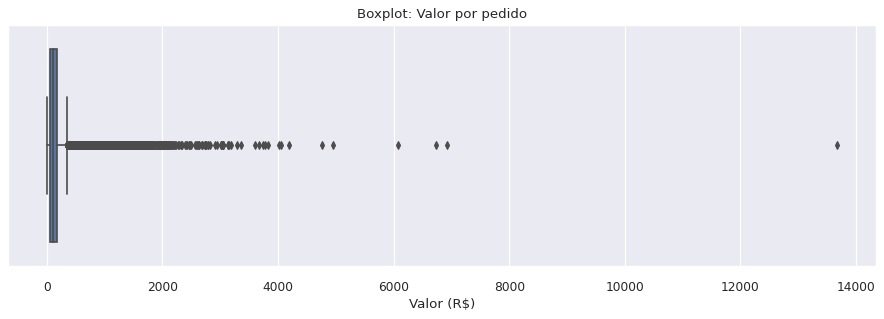

In [ ]:
sns.set_theme()
plt.figure(figsize=(14,4),dpi=80)
sns.boxplot(x = 'payment_value',data = df, orient = 'h')
plt.title('Boxplot: Valor por pedido')
plt.xlabel('Valor (R$)')
plt.show()

In [ ]:
df2 = df[df['payment_value']<10000]

* Após a remoção deste outlier, percebe-se que a maioria dos pedidos recebidos foram entre R\$ 60,00 e R\$ 180,00;
* Apenas 5% dos pedidos apresentaram valores acima de R$ 450,00.

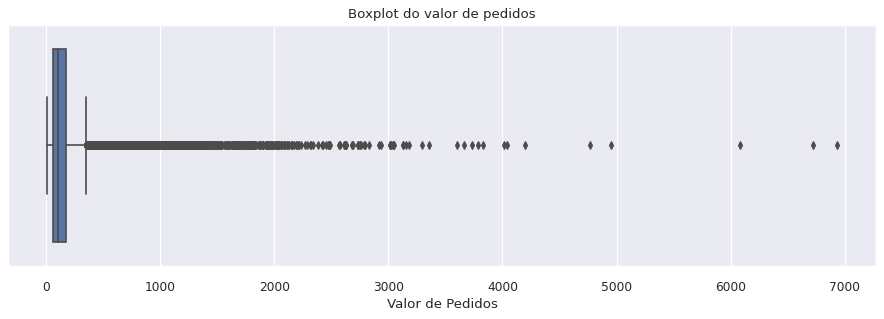

In [ ]:
plt.figure(figsize=(14,4),dpi=80)
sns.boxplot(x = 'payment_value',data = df2, orient = 'h')
plt.title('Boxplot do valor de pedidos')
plt.xlabel('Valor de Pedidos')
plt.show()

In [ ]:
df[df['payment_value']>10000]

,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,review_score,review_creation_date,review_answer_timestamp
3604,rio de janeiro,RJ,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,13664.08,1,2017-10-18,2017-10-19 13:10:39


#### Vendas por Mês
* Observou-se um crescimento aproximadamente linear ao longo do período, com tendência positiva.
* O valor total das vendas cresceu, cerca de 617%, no período entre janeiro de 2017 e fevereiro de 2018. 
* Um aumento maior do que o esperado pela tendência foi observado em novembro (Black Friday?), apresentando uma queda em dezembro.
* Mesmo com a queda identificada no mês de dezembro, com relação à novembro, dezembro foi um mês com alto volume de vendas.
* O início do ano de 2018, representado pelos meses de janeiro e fevereiro, também se destacou em termos de valor total de vendas.

In [ ]:
payment_ano_df = df2.groupby(pd.Grouper(key='order_purchase_timestamp',freq='M')).agg({'payment_value':'sum'})
payment_ano_df.index = payment_ano_df.index.map(lambda x: dt.datetime(x.year,x.month,1))

fig=px.line(data_frame=payment_ano_df,
            x=payment_ano_df.index,
            y='payment_value',
            template='plotly_white',
            title='Vendas por mês',
            labels={'payment_value':'Recenta Mensal',
                    'order_purchase_timestamp':'Mês'})
            
#  
fig.show()

In [ ]:
df_percent = payment_ano_df.diff().iloc[1:]
df_percent['payment_value']=df_percent['payment_value']/payment_ano_df['payment_value'].iloc[:-1].to_numpy()*100

In [ ]:
df_percent.head()

,payment_value
order_purchase_timestamp,
2017-02-01,111.651031
2017-03-01,52.515649
2017-04-01,-6.380722
2017-05-01,41.754482
2017-06-01,-13.558217


In [ ]:
df_percent["Color"] = np.where(df_percent["payment_value"]<0, 'red', 'blue')

#### Crescimento Percentual das Vendas
* Os primeiros meses do ano apresentaram rápido crescimento relativo
* Alguns meses, como abril e junho, apresentaram leve queda nas vendas, com destaque ao mês de dezembro (devido à alta observada em Novembro? Black Friday?)

In [ ]:
fig=px.bar(df_percent,
        x=df_percent.index,
        y='payment_value',
        text='payment_value',
        color = df_percent['Color'],
        color_discrete_sequence = ['blue','red'],
        template='plotly_white',
        title='Crescimento percentual das vendas'
        )

fig.update_traces(texttemplate='%{text:.1f}%', 
                  textposition="outside"
                 )

fig.update_layout(xaxis={"title":"Mês/Ano",'nticks':df_percent.shape[0]}, yaxis={"title":"Crescimento (%)"},\
                  showlegend=False)
                  
fig.update_xaxes(tickfont={'size':10})
fig.update_yaxes(showticklabels = False)
fig.update_layout(annotations=[{
    'text':'Fevereiro foi o mês de maior crescimento!',
    'xref':'x', 
    'yref':'y', 
    'x':'Feb 1, 2017', 
    'y':111.65103083318031,
    'showarrow':True,
    'ax': 0,
    'ay': -80,
    'font':dict(
            family="Nunito",
            size=15,
            color="#e67e22"
            )
}])
fig.show()

In [ ]:
payment_estados_df = df2.groupby([pd.Grouper(key='order_purchase_timestamp',freq='M'),'customer_state'], as_index=True).agg({'payment_value':'sum'})
payment_estados_df.reset_index(inplace=True)
payment_estados_df['order_purchase_timestamp'] = payment_estados_df['order_purchase_timestamp'].map(lambda x: dt.datetime(x.year,x.month,1))
payment_estados_df.head()

,order_purchase_timestamp,customer_state,payment_value
0,2017-01-01,AC,723.15
1,2017-01-01,AL,454.36
2,2017-01-01,BA,4511.37
3,2017-01-01,CE,1266.13
4,2017-01-01,DF,2104.75


In [ ]:
#Tiago

array_estados = df2.customer_state.unique()

payment_ano_uf_df = df2.loc[df2['customer_state'] == 'SP'].groupby(pd.Grouper(key='order_purchase_timestamp',freq='M')).agg({'payment_value':'sum'})
#payment_ano_uf_df.head()
payment_ano_uf_df.index = payment_ano_uf_df.index.map(lambda x: dt.datetime(x.year,x.month,1))


df_uf_percent = payment_ano_uf_df.diff().iloc[1:]
df_uf_percent['payment_value']=df_uf_percent['payment_value']/payment_ano_uf_df['payment_value'].iloc[:-1].to_numpy()*100

df_uf_percent.head()

,payment_value
order_purchase_timestamp,
2017-02-01,96.684493
2017-03-01,71.123716
2017-04-01,-3.964968
2017-05-01,34.138240
2017-06-01,-1.505152


In [ ]:
payment_ano_uf_df.head()

,payment_value
order_purchase_timestamp,
2017-01-01,46881.22
2017-02-01,92208.09
2017-03-01,157789.91
2017-04-01,151533.59
2017-05-01,203264.49


#### Evolução mensal do Market Share dos Estados

* O estado que representa a maior receita é o estado de Sâo Paulo, seguido de Rio de Janeiro e Minas Gerais, respectivamente.
* As curvas de evolução do valor total das compras seguiram um comportamento semelhante para todos os estados, ou seja, os períodos de crescimento e de queda do valor total das vendas ocorrem de maneira muito similar.  

In [ ]:
fig = px.area(payment_estados_df.sort_values(by = 'payment_value',ascending=False), 
                x='order_purchase_timestamp',
                y='payment_value', 
                color='customer_state',
                title="",
                labels={'payment_value':'Recenta Mensal',
                    'order_purchase_timestamp':'Mês'})
fig.update_traces(texttemplate='%{text:.3s}',)
# fig.update_layout(xaxis={"tick0":5000, "dtick":3,"title":"Mês/Ano"},yaxis={"title":"Receita (em Milhões)"})
fig.show()

In [ ]:
array_estados = df.customer_state.unique()
df_percent_state = pd.DataFrame(data=None,columns=payment_estados_df.columns)


for i in array_estados:
    aux = payment_estados_df.loc[payment_estados_df['customer_state']==i]['payment_value'].diff().iloc[1:]
    aux = aux/payment_estados_df.loc[payment_estados_df['customer_state']==i]['payment_value'].iloc[:-1].to_numpy()*100
    
    df_aux = pd.DataFrame(data=None,columns=payment_estados_df.columns)
    df_aux['payment_value']=aux
    df_aux['order_purchase_timestamp']=payment_estados_df.loc[payment_estados_df['customer_state']==i]['order_purchase_timestamp'][1:]
    df_aux['customer_state']=i
    df_percent_state=df_percent_state.append(df_aux)

df_percent_state.head()

,order_purchase_timestamp,customer_state,payment_value
49,2017-02-01,SP,96.684493
76,2017-03-01,SP,71.123716
102,2017-04-01,SP,-3.964968
129,2017-05-01,SP,34.138240
156,2017-06-01,SP,-1.505152


In [ ]:
df_percent_tot = df_percent_state.groupby(by='customer_state').agg({'payment_value':'mean'}).sort_values(by='payment_value',ascending=True)
df_percent_tot.head()

,payment_value
customer_state,
RS,14.013368
AC,18.771189
MG,19.548731
SP,21.309923
MT,21.549784


 #### Crescimento médio de vendas nos estados 

* Durante o período analisado, o estado que apresentou maior crescimento médio no volume de vendas foi Mato Grosso do Sul, seguido por Amazonas e Tocantins.
* Embora o estado de Mato Grosso do Sul tenha apresentado o maior crescimento (361%), este representa apenas 1,02% do volume total de vendas no último mês dos dados disponíveis. 
* Entre os estados de menor crescimento médio mensal no valor total de vendas, destaca-se o Rio grande do Sul.
* Vale ressaltar que estados com grande participação de mercado, como São Paulo e Minas Gerais, apareceram aqui entre os de menor crescimento médio mensal. No caso de São Paulo, verifica-se um crescimento médio de 21,30%, sendo que ele possui um volume de vendas que representa 36,22% de todas as vendas.

In [ ]:
fig = px.bar(df_percent_tot.iloc[-5:], 
            x="payment_value", 
            orientation="h",
            color=df_percent_tot.iloc[-5:].index,
            title="Principais Estados em Crescimento Médio Mensal",
            text="payment_value",
            template='plotly_white',
            color_discrete_sequence=['lightgrey','lightgrey','lightgrey','lightgrey','blue'])

fig.update_traces(texttemplate='%{text:.1f}%', 
                  textposition="inside"
                 )
                 
fig.update_layout(xaxis={"title":"Crescimento médio mensal (%)"}, yaxis={"title":"Estados"},showlegend=False)
fig.update_xaxes(showticklabels = False)
fig.show()

In [ ]:
fig = px.bar(df_percent_tot.iloc[0:5].sort_values(by='payment_value',ascending=False), 
            x="payment_value", 
            orientation="h",
            color=df_percent_tot.iloc[0:5].index,
            title="Estados com Menor Crescimento Médio Mensal",
            text="payment_value",
            template='plotly_white',
            color_discrete_sequence = ['rosybrown','rosybrown','rosybrown','rosybrown','red'])

fig.update_traces(texttemplate='%{text:.1f}%', 
                  textposition="inside"
                 )
                 
fig.update_layout(xaxis={"title":"Crescimento médio mensal (%)"}, yaxis={"title":"Estados"},showlegend=False)
fig.update_xaxes(showticklabels = False)
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e65dbc8-6dcb-4e84-9863-633250d55d5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>